# Aprendizagem Automatica Avançada
### Assigment 7 - Time Series
Ana Araújo 59457

Pedro Almeida 58844

### Content Table:
1. [ Functions for each model](#section1)
- LSTM model
- FTLFN model

2. [Problem 1](#section2)
- Creation of the time series
- Without noise
- With noise

3. [Problem 2](#section3)
- Creation of the time series
- With noise


In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
from IPython.display import Image


# tensorflow
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
#from tensorflow.keras.models import Model

<a id='section1'></a>


## 1. Functions for each model
We develop functions for the LSTM and FTLFN models at this step.<p>
In the functions, we build the model, fit it to the training data, and evaluate the outcomes.

### 1.1. LSTM Model:

In [ ]:
def lstm(X_train, y_train, X_test, y_test, epochs, noise = False, noise_value = 0.05):

    # model creation: layers + dropout + 12 neurons
    if(noise == False):
        lstm_model = Sequential([
        layers.LSTM(12, return_sequences=True),
        layers.Dropout(0.2),
        layers.LSTM(12, return_sequences=True),
        layers.Dropout(0.2),
        layers.LSTM(12),
        layers.Dropout(0.2),
        layers.Dense(1)
        ])
    else:
        lstm_model = Sequential([
        layers.GaussianNoise(noise_value),
        layers.LSTM(12, return_sequences=True),
        layers.Dropout(0.2),
        layers.LSTM(12, return_sequences=True),
        layers.Dropout(0.2),
        layers.LSTM(12),
        layers.Dropout(0.2),
        layers.Dense(1)
        ])


    # compile
    lstm_model.compile(optimizer = 'adam', loss = keras.losses.MeanSquaredError(), metrics=[tf.metrics.MeanAbsoluteError()])


    # Fitting the RNN to the Training set
    history_lstm = lstm_model.fit(X_train,y_train,epochs = epochs)

    print("\n")

    # plot loss plot
    plt.plot(history_lstm.history['loss'], label="loss")
    plt.legend(loc="upper right")
    plt.title("Loss Plot")
    plt.show()

    # inferring MSE % RMSE
    predictions = lstm_model.predict(X_test)
    test_score = mean_squared_error(y_test, predictions)
    print('LSTM Model Test MSE: %.3f' % test_score)
    print('LSTM Model Test RMSE: %.3f' % sqrt(test_score))

    # plot predictions and expected results
    fig = plt.figure(figsize=(40,10))
    plt.plot(y_train,  label="Train")
    plt.plot([None for i in y_train] + [x for x in y_test], label="Test")
    plt.plot([None for i in y_train] + [x for x in predictions], label="Predicted")
    plt.legend(loc="upper left", prop= {"size": 15})
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.title("Train, Test and Predicted Results")
    plt.show()


### 1.2. FTLFN Model:

In [ ]:
def ftlfn(X_train, y_train, X_test, y_test, epochs, noise = False, noise_value = 0.05):

    # model creation: layers + dropout + 12 neurons
    if(noise == False):
        ftlfn_model = Sequential([
        layers.Dense(12, activation='relu'),
        layers.Dense(1)
        ])
    else:
        ftlfn_model = Sequential([
        layers.GaussianNoise(noise_value),
        layers.Dense(12, activation='relu'),
        layers.Dense(1)
        ])


    # compile
    ftlfn_model.compile(optimizer = 'adam', loss = keras.losses.MeanSquaredError(), metrics=[tf.metrics.MeanAbsoluteError()])

    # Fitting the RNN to the Training set
    train_performance, test_performance = list(), list()

    for i in range(epochs):
        history_ftlfn = ftlfn_model.fit(X_train,y_train,epochs = 1)

        train_performance.append(ftlfn_model.evaluate(X_train, y_train, verbose=0)[0])
        test_performance.append(ftlfn_model.evaluate(X_test_1, y_test_1, verbose = 0)[0])

    performance = pd.DataFrame()
    performance["train_mse"], performance["test_mse"] = train_performance, test_performance

    return performance


In [ ]:
def run_ftlfn(X_train, y_train, X_test, y_test, repeats, epochs, noise = False, noise_value = 0.05):
    # constructing the feedforward network

    aux=0
    for i in range(repeats):
        history = ftlfn(X_train, y_train, X_test, y_test, epochs)
        plt.plot(history['train_mse'], color='blue', label = "Train")
        plt.plot(history['test_mse'], color='orange', label = "Test")
        if aux == 0:
            plt.title("MSE for Train and Test Sets")
            plt.legend(loc="upper left", prop= {"size": 10})
            aux=1
        print('Repeat %d) TrainMSE=%f, TestMSE=%f' % (i, history['train_mse'].iloc[-1], history['test_mse'].iloc[-1]),"\n")

<a id='section2'></a>

## 2. Problem 1

We will study the evolution of the LSTM and FTLFN learning rate processes and compare their performances with and without noise, using different sets of time series data points (with Epochs = 10).

### 2.1. Creation of the time series

With a sinusoidal function, 100 periods, 50 points each period, and a 12-second time delay, we produced a time series.
We subset the timeseries dataset in two different ways to evaluate the performance of each model (LSTM and FTLFN):
  * The first 2400 data points and test with data points 2401 to 2500
  * Data points 2401 to 4900 and test with data points 4901 to 5000

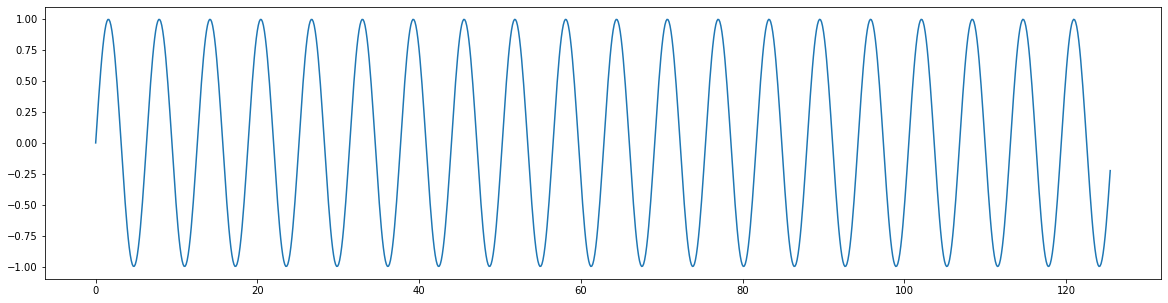

In [ ]:
lag = 12
points = np.linspace(0, 2*math.pi*100, 50*100)
sin = np.sin(points)

fig = plt.figure(figsize=(20,5))


# plot the function - first
plt.plot(points[0:999], sin[0:999])
plt.show()

Adding a time delay of 12 to the time series:

In [ ]:
X = []
y = []

for i in range(lag, 4999):
   X.append(sin[i-lag:i])
   y.append(sin[i])

X = np.expand_dims(X, axis = 2)
y = np.array(y)

Split Data:

- Training with the first 2400 data points and testing with data points 2401 to 2501 (First split);
  
- Training from data points 2401 to 4900 and testing with data points 4901 to the last data point (Second split).

In [ ]:
X_train_1 = X[:2400]
y_train_1 = y[:2400]
X_test_1  = X[2401:2501]
y_test_1  = y[2401:2501]

X_train_2 = X[2401:4900]
y_train_2 = y[2401:4900]
X_test_2  = X[4901:-1]
y_test_2  = y[4901:-1]

print("Shape of sets: \n")
print("--> First Split Train and Test sets:")
print("X_train_1: ", X_train_1.shape)
print("y_train_1: ", y_train_1.shape)
print("X_test_1: ", X_test_1.shape)
print("y_test_1: ", y_test_1.shape,"\n")

print("--> Second Split Train and Test sets:")
print("X_train_2: ", X_train_2.shape)
print("y_train_2: ", y_train_2.shape)
print("X_test_2: ", X_test_2.shape)
print("y_test_2: ", y_test_2.shape)

Shape of sets: 

--> First Split Train and Test sets:
X_train_1:  (2400, 12, 1)
y_train_1:  (2400,)
X_test_1:  (100, 12, 1)
y_test_1:  (100,) 

--> Second Split Train and Test sets:
X_train_2:  (2499, 12, 1)
y_train_2:  (2499,)
X_test_2:  (85, 12, 1)
y_test_2:  (85,)


 ### 2.2 Evolution of LSTM and FTLFN learning without noise

### 2.2.1. LSTM Model

### 2.2.1.1 First partition:

Epoch 1/10
75/75 [==============================] - 15s 12ms/step - loss: 0.3708 - mean_absolute_error: 0.5455
Epoch 2/10
75/75 [==============================] - 1s 12ms/step - loss: 0.1432 - mean_absolute_error: 0.3161
Epoch 3/10
75/75 [==============================] - 1s 12ms/step - loss: 0.0464 - mean_absolute_error: 0.1710
Epoch 4/10
75/75 [==============================] - 1s 12ms/step - loss: 0.0336 - mean_absolute_error: 0.1441
Epoch 5/10
75/75 [==============================] - 1s 12ms/step - loss: 0.0304 - mean_absolute_error: 0.1382
Epoch 6/10
75/75 [==============================] - 1s 12ms/step - loss: 0.0267 - mean_absolute_error: 0.1289
Epoch 7/10
75/75 [==============================] - 1s 12ms/step - loss: 0.0247 - mean_absolute_error: 0.1224
Epoch 8/10
75/75 [==============================] - 1s 11ms/step - loss: 0.0234 - mean_absolute_error: 0.1192
Epoch 9/10
75/75 [==============================] - 1s 12ms/step - loss: 0.0223 - mean_absolute_error: 0.1154
Epoch 10/

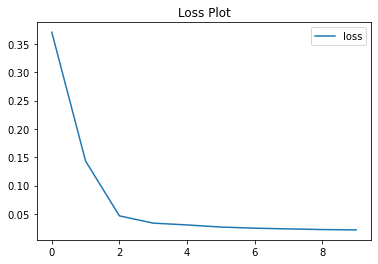

4/4 [==============================] - 3s 6ms/step
LSTM Model Test MSE: 0.002
LSTM Model Test RMSE: 0.042


C:\Users\pedro\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


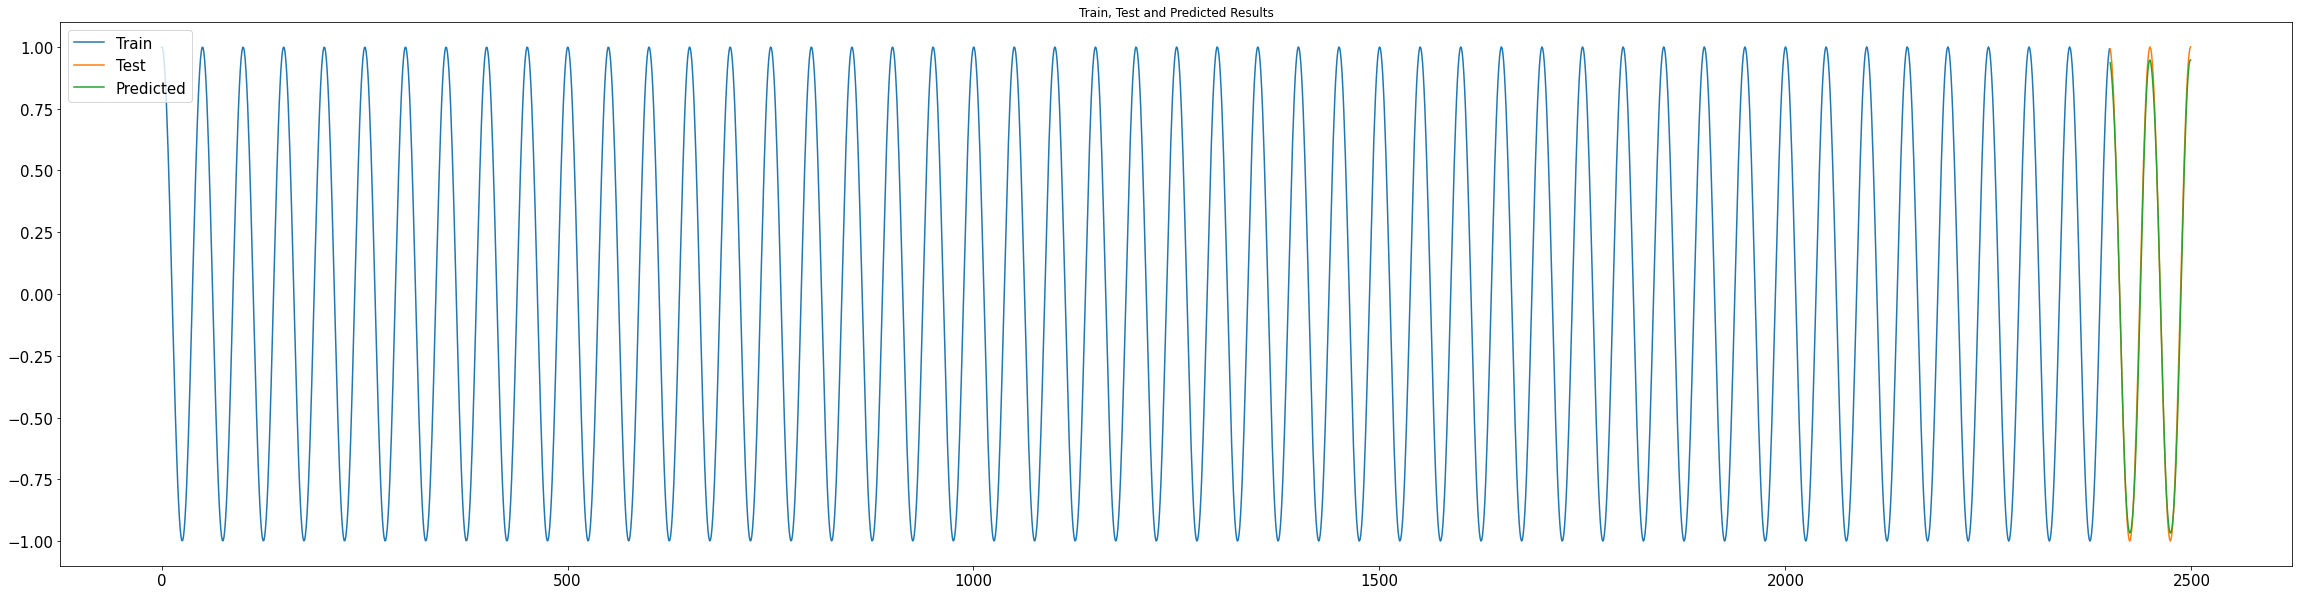

In [ ]:
lstm(X_train_1, y_train_1, X_test_1, y_test_1, 10)

### 2.2.1.2 Second partition:

Epoch 1/10
79/79 [==============================] - 13s 16ms/step - loss: 0.3855 - mean_absolute_error: 0.5565
Epoch 2/10
79/79 [==============================] - 1s 16ms/step - loss: 0.1281 - mean_absolute_error: 0.2931
Epoch 3/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0422 - mean_absolute_error: 0.1601
Epoch 4/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0328 - mean_absolute_error: 0.1429
Epoch 5/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0282 - mean_absolute_error: 0.1311
Epoch 6/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0260 - mean_absolute_error: 0.1260
Epoch 7/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0241 - mean_absolute_error: 0.1210
Epoch 8/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0219 - mean_absolute_error: 0.1157
Epoch 9/10
79/79 [==============================] - 1s 16ms/step - loss: 0.0217 - mean_absolute_error: 0.1141
Epoch 10/

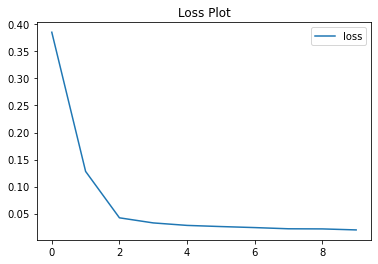

3/3 [==============================] - 2s 7ms/step
LSTM Model Test MSE: 0.002
LSTM Model Test RMSE: 0.043


C:\Users\pedro\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


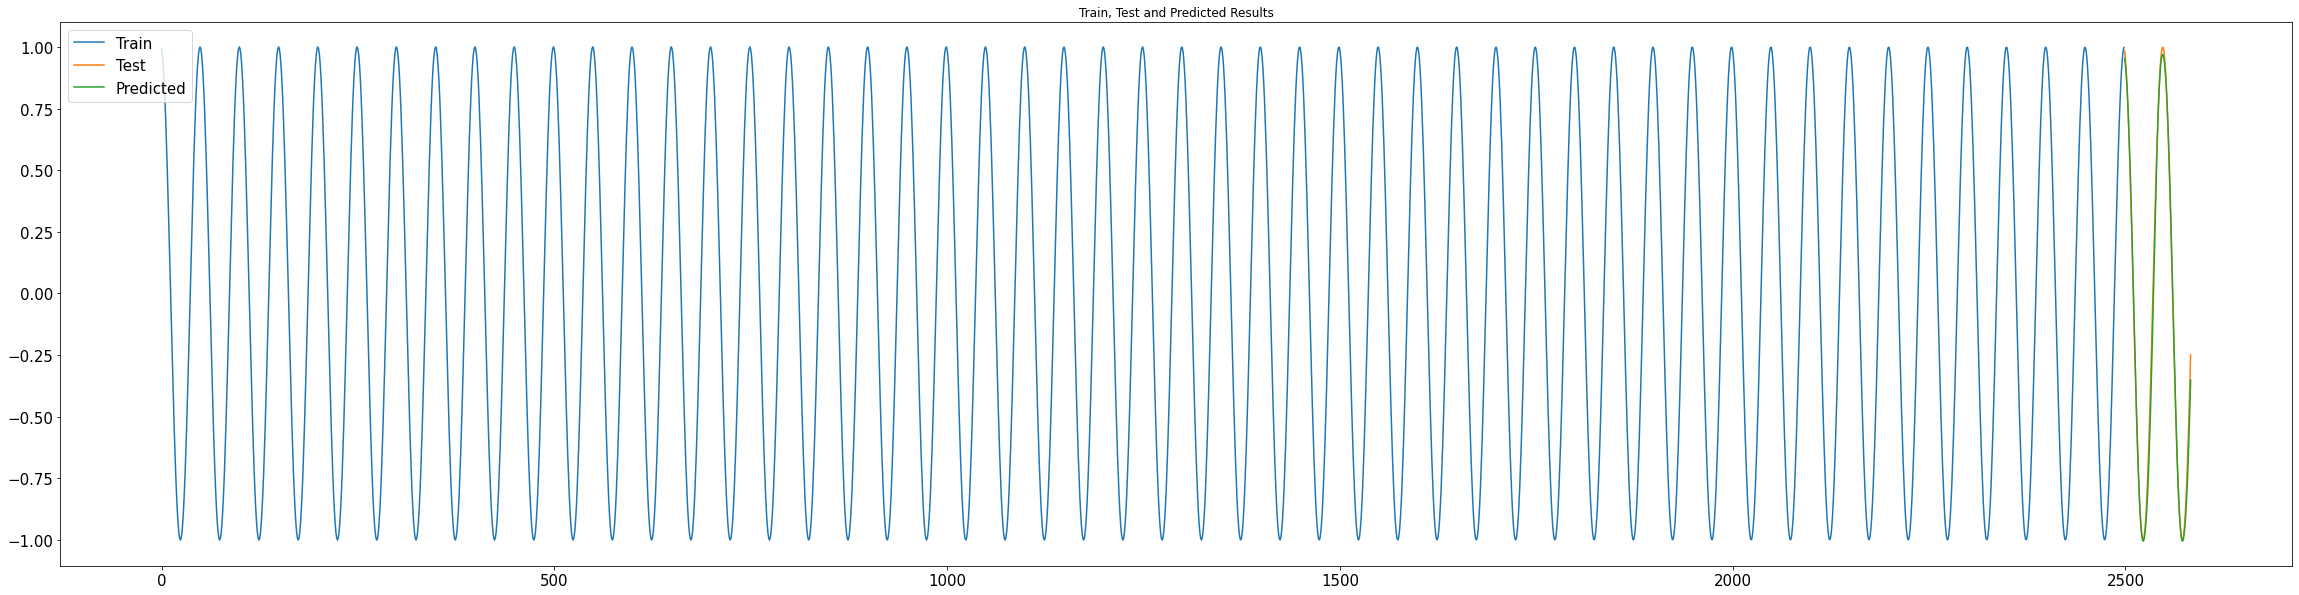

In [ ]:
lstm(X_train_2, y_train_2, X_test_2, y_test_2, 10)

### 2.2.2. FTLFN Model

### 2.2.2.1. First partition:

75/75 [==============================] - 0s 2ms/step - loss: 0.5006 - mean_absolute_error: 0.6370
Repeat 0) TrainMSE=0.497055, TestMSE=0.495792 

75/75 [==============================] - 0s 2ms/step - loss: 0.5007 - mean_absolute_error: 0.6369
Repeat 1) TrainMSE=0.498005, TestMSE=0.496096 

75/75 [==============================] - 0s 2ms/step - loss: 0.5005 - mean_absolute_error: 0.6368
Repeat 2) TrainMSE=0.497349, TestMSE=0.495988 

75/75 [==============================] - 0s 2ms/step - loss: 0.5010 - mean_absolute_error: 0.6370
Repeat 3) TrainMSE=0.498696, TestMSE=0.498514 

75/75 [==============================] - 0s 2ms/step - loss: 0.5001 - mean_absolute_error: 0.6366
Repeat 4) TrainMSE=0.497839, TestMSE=0.496967 

75/75 [==============================] - 0s 804us/step - loss: 0.5005 - mean_absolute_error: 0.6369
Repeat 5) TrainMSE=0.497962, TestMSE=0.497117 

75/75 [==============================] - 0s 784us/step - loss: 0.5004 - mean_absolute_error: 0.6369
Repeat 6) TrainMSE=0.4

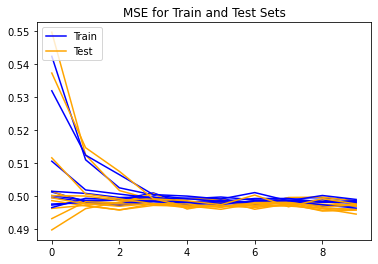

In [ ]:
run_ftlfn(X_train_1, y_train_1, X_test_1, y_test_1, 10, 10)

### 1.2.2.2. Second partition:

79/79 [==============================] - 0s 866us/step - loss: 0.5002 - mean_absolute_error: 0.6362
Repeat 0) TrainMSE=0.498400, TestMSE=0.498109 

79/79 [==============================] - 0s 846us/step - loss: 0.5002 - mean_absolute_error: 0.6363
Repeat 1) TrainMSE=0.498411, TestMSE=0.498103 

79/79 [==============================] - 0s 859us/step - loss: 0.5004 - mean_absolute_error: 0.6367
Repeat 2) TrainMSE=0.497629, TestMSE=0.497125 

79/79 [==============================] - 0s 827us/step - loss: 0.5003 - mean_absolute_error: 0.6367
Repeat 3) TrainMSE=0.497876, TestMSE=0.497119 

79/79 [==============================] - 0s 904us/step - loss: 0.5001 - mean_absolute_error: 0.6367
Repeat 4) TrainMSE=0.497711, TestMSE=0.497087 

79/79 [==============================] - 0s 853us/step - loss: 0.5000 - mean_absolute_error: 0.6365
Repeat 5) TrainMSE=0.497289, TestMSE=0.496311 

79/79 [==============================] - 0s 853us/step - loss: 0.5000 - mean_absolute_error: 0.6365
Repeat 6) Tr

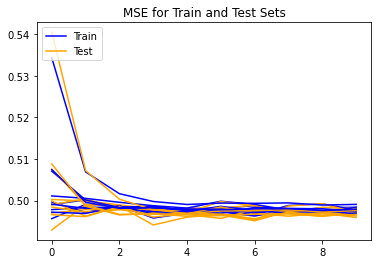

In [ ]:
run_ftlfn(X_train_2, y_train_2, X_test_2, y_test_2, 10, 10)

### 2.3. Evaluating the performance of LSTM and FTLFN models with both splits and without noise



**LSTM Model - Split 1 Vs Split 2:** <p>
The obtained MSE outcomes reveal that split 2 has generated better predictions than split 1 and has demonstrated decreased MSE values as the learning process has progressed (epochs). Even while the difference is not really that big, it is generally as predicted given how similar both partitions are.

<br>

**FTLFN Model - Split 1 Vs Split 2:** <p>
In comparison to split 2, the MSE for split 1 demonstrated superior stability as the learning process progressed through more epochs. <p>
As a result, split 1 had a quicker learning curve and was able to train both models more effectively than split 2.
<br>

**LSTM vs FTLFN Model:** <p>
In both splits, the LSTM model had lower MSE values than the FTLFN model.

<br>





### 2.3. Evolution of LSTM and FTLFN learning with noise

### 2.3.1. LSTM Model

### 2.3.1.1. First partition:

Epoch 1/10
75/75 [==============================] - 4s 6ms/step - loss: 0.3580 - mean_absolute_error: 0.5359
Epoch 2/10
75/75 [==============================] - 0s 6ms/step - loss: 0.1192 - mean_absolute_error: 0.2853
Epoch 3/10
75/75 [==============================] - 0s 6ms/step - loss: 0.0383 - mean_absolute_error: 0.1540
Epoch 4/10
75/75 [==============================] - 0s 6ms/step - loss: 0.0312 - mean_absolute_error: 0.1393
Epoch 5/10
75/75 [==============================] - 0s 6ms/step - loss: 0.0268 - mean_absolute_error: 0.1276
Epoch 6/10
75/75 [==============================] - 0s 6ms/step - loss: 0.0242 - mean_absolute_error: 0.1222
Epoch 7/10
75/75 [==============================] - 0s 6ms/step - loss: 0.0228 - mean_absolute_error: 0.1188
Epoch 8/10
75/75 [==============================] - 0s 6ms/step - loss: 0.0218 - mean_absolute_error: 0.1167
Epoch 9/10
75/75 [==============================] - 0s 6ms/step - loss: 0.0208 - mean_absolute_error: 0.1128
Epoch 10/10
75/75 [

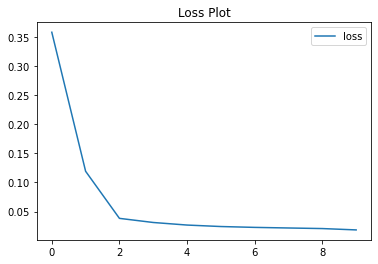

4/4 [==============================] - 1s 2ms/step
LSTM Model Test MSE: 0.001
LSTM Model Test RMSE: 0.030


C:\Users\pedro\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


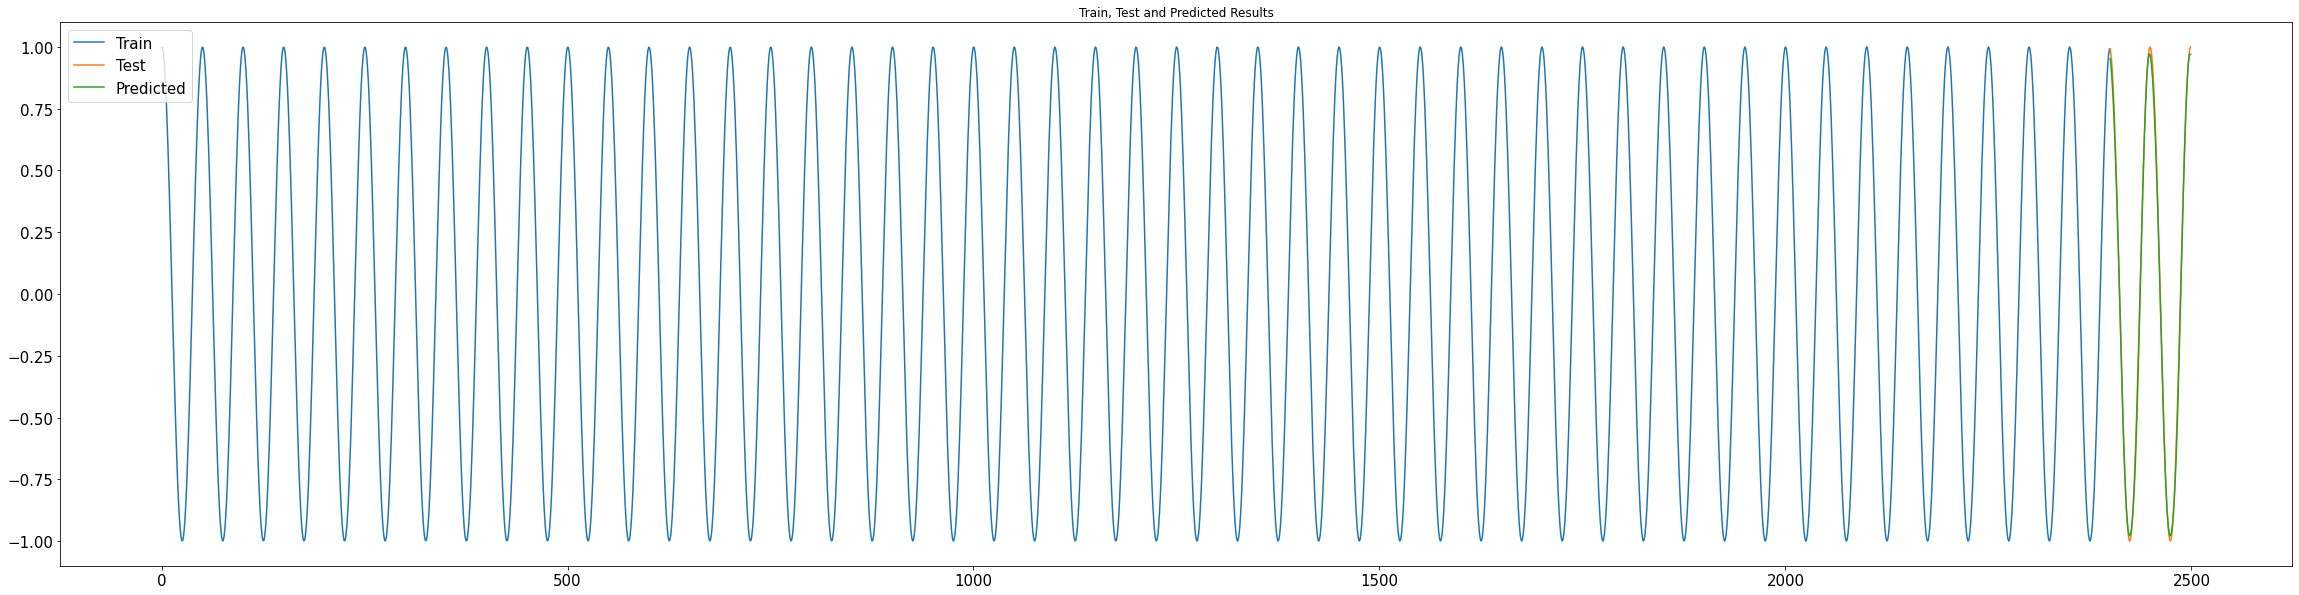

In [ ]:
lstm(X_train_1, y_train_1, X_test_1, y_test_1, 10, True)

### 2.3.1.2. Second partition:

Epoch 1/10
79/79 [==============================] - 5s 8ms/step - loss: 0.3396 - mean_absolute_error: 0.5217
Epoch 2/10
79/79 [==============================] - 1s 8ms/step - loss: 0.1076 - mean_absolute_error: 0.2674
Epoch 3/10
79/79 [==============================] - 1s 8ms/step - loss: 0.0400 - mean_absolute_error: 0.1560
Epoch 4/10
79/79 [==============================] - 1s 8ms/step - loss: 0.0323 - mean_absolute_error: 0.1405
Epoch 5/10
79/79 [==============================] - 1s 8ms/step - loss: 0.0293 - mean_absolute_error: 0.1338
Epoch 6/10
79/79 [==============================] - 1s 8ms/step - loss: 0.0261 - mean_absolute_error: 0.1275
Epoch 7/10
79/79 [==============================] - 1s 8ms/step - loss: 0.0257 - mean_absolute_error: 0.1257
Epoch 8/10
79/79 [==============================] - 1s 8ms/step - loss: 0.0248 - mean_absolute_error: 0.1233
Epoch 9/10
79/79 [==============================] - 1s 8ms/step - loss: 0.0218 - mean_absolute_error: 0.1155
Epoch 10/10
79/79 [

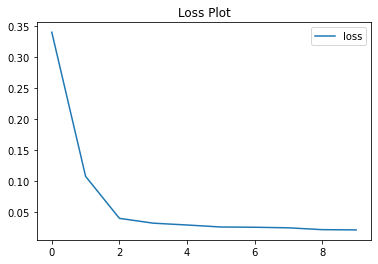

3/3 [==============================] - 1s 3ms/step
LSTM Model Test MSE: 0.002
LSTM Model Test RMSE: 0.046


C:\Users\pedro\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


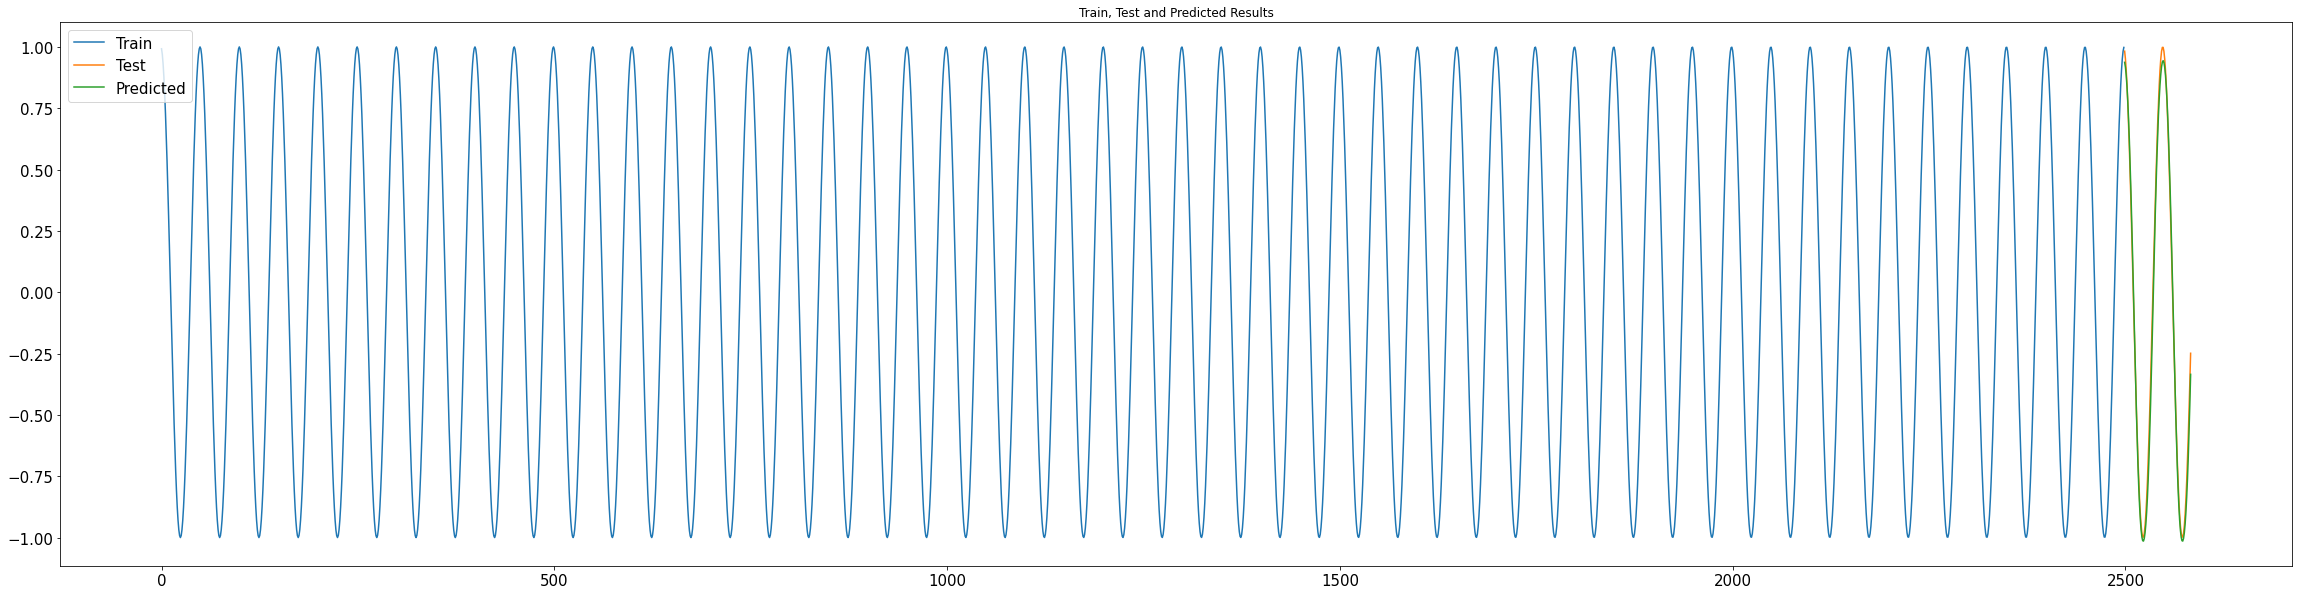

In [ ]:
lstm(X_train_2, y_train_2, X_test_2, y_test_2, 10, True)

### 2.3.2. FTLFN Model

### 2.3.2.1. First partition:

75/75 [==============================] - 0s 757us/step - loss: 0.5004 - mean_absolute_error: 0.6368
Repeat 0) TrainMSE=0.497809, TestMSE=0.496841 

75/75 [==============================] - 0s 777us/step - loss: 0.5008 - mean_absolute_error: 0.6368
Repeat 1) TrainMSE=0.496504, TestMSE=0.494326 

75/75 [==============================] - 0s 777us/step - loss: 0.5006 - mean_absolute_error: 0.6370
Repeat 2) TrainMSE=0.498671, TestMSE=0.498145 

75/75 [==============================] - 0s 779us/step - loss: 0.5001 - mean_absolute_error: 0.6366
Repeat 3) TrainMSE=0.497880, TestMSE=0.496780 

75/75 [==============================] - 0s 777us/step - loss: 0.5004 - mean_absolute_error: 0.6367
Repeat 4) TrainMSE=0.498617, TestMSE=0.497751 

75/75 [==============================] - 0s 764us/step - loss: 0.5006 - mean_absolute_error: 0.6367
Repeat 5) TrainMSE=0.499622, TestMSE=0.499886 

75/75 [==============================] - 0s 791us/step - loss: 0.5001 - mean_absolute_error: 0.6366
Repeat 6) Tr

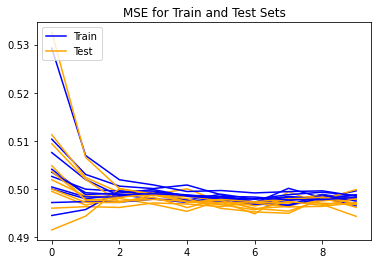

In [ ]:
run_ftlfn(X_train_1, y_train_1, X_test_1, y_test_1, 10, 10, True)

### 2.3.2.2. Second partition:

79/79 [==============================] - 0s 878us/step - loss: 0.4999 - mean_absolute_error: 0.6365
Repeat 0) TrainMSE=0.496671, TestMSE=0.495746 

79/79 [==============================] - 0s 898us/step - loss: 0.5002 - mean_absolute_error: 0.6367
Repeat 1) TrainMSE=0.496362, TestMSE=0.494790 

79/79 [==============================] - 0s 878us/step - loss: 0.5006 - mean_absolute_error: 0.6367
Repeat 2) TrainMSE=0.497393, TestMSE=0.495740 

79/79 [==============================] - 0s 878us/step - loss: 0.5006 - mean_absolute_error: 0.6366
Repeat 3) TrainMSE=0.497712, TestMSE=0.497188 

79/79 [==============================] - 0s 853us/step - loss: 0.5002 - mean_absolute_error: 0.6366
Repeat 4) TrainMSE=0.497921, TestMSE=0.497542 

79/79 [==============================] - 0s 904us/step - loss: 0.5006 - mean_absolute_error: 0.6366
Repeat 5) TrainMSE=0.498470, TestMSE=0.498426 

79/79 [==============================] - 0s 840us/step - loss: 0.5005 - mean_absolute_error: 0.6367
Repeat 6) Tr

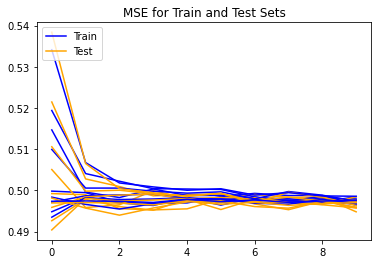

In [ ]:
run_ftlfn(X_train_2, y_train_2, X_test_2, y_test_2, 10, 10, True)

### 2.3.3. Evaluating the performance of LSTM and FTLFN models with both splits and with noise



**LSTM Model - Split 1 Vs Split 2:** <p>
The obtained MSE results demonstrates that the split 1 have shown smaller MSE values as the leaning process increases (epochs) and made better predictions, compared with split 2.

<br>

**FTLFN Model - Split 1 Vs Split 2:** <p>
The split 2 as the learning process increases (epochs) the MSE showed a better stabilization in comparation with split 1. <p>
Thus, split 2 showed to have a faster learning process and was able to train the both models in a better way, then split 1.

<br>

**LSTM vs FTLFN Model:** <p>
In both splits, LSTM model showed smaller MSE values compared with FTLFN model.

<br>


<a id='section3'></a>

## 3. Problem 2

We generated 5000 data points by defining a time series using the output of the following autoregression model with a time delay of 12.

α1 = 0.6, α2= -0.54, α3= -0.44 <p>

We subset the timeseries dataset in two different manners, in order to evaluate the performances when run with each model (LSTM and FTLFN) with:
 * Gaussin Noise N(0,0.01)
 * 50 epochs

<p>

**Splits:**
  * The first 2400 data points and test with data points 2401 to 2500
  * Data points 2401 to 4900 and test with data points 4901 to 5000

### 3.1. Creation of a time series:

In [ ]:
data = [5,6,3]

for i in range(4997):
    out = (0.6*data[i+2]) + (-0.54*data[i+1]) + (-0.44*data[i]) #+ 0.01 (U)
    data.append(out)

print(len(data))

5000


Adding a time delay of 12 to the time series:

In [ ]:
X = []
y = []
lag = 12

for i in range(lag, 4999):
   X.append(data[i-lag:i])
   y.append(data[i])

X = np.expand_dims(X, axis = 2)
y = np.array(y)

Split Data:

- Training with the first 2400 data points and testing with data points 2401 to 2501 (First split);
  
- Training from data points 2401 to 4900 and testing with data points 4901 to the last data point (Second split).

In [ ]:
X_train_1 = X[:2400]
y_train_1 = y[:2400]
X_test_1  = X[2401:2501]
y_test_1  = y[2401:2501]

X_train_2 = X[2401:4900]
y_train_2 = y[2401:4900]
X_test_2  = X[4901:-1]
y_test_2  = y[4901:-1]

print("Shape of sets: \n")
print("--> First Split Train and Test sets:")
print("X_train_1: ", X_train_1.shape)
print("y_train_1: ", y_train_1.shape)
print("X_test_1: ", X_test_1.shape)
print("y_test_1: ", y_test_1.shape,"\n")

print("--> Second Split Train and Test sets:")
print("X_train_2: ", X_train_2.shape)
print("y_train_2: ", y_train_2.shape)
print("X_test_2: ", X_test_2.shape)
print("y_test_2: ", y_test_2.shape)

Shape of sets: 

--> First Split Train and Test sets:
X_train_1:  (2400, 12, 1)
y_train_1:  (2400,)
X_test_1:  (100, 12, 1)
y_test_1:  (100,) 

--> Second Split Train and Test sets:
X_train_2:  (2499, 12, 1)
y_train_2:  (2499,)
X_test_2:  (85, 12, 1)
y_test_2:  (85,)


### 3.2. Evolution of LSTM and FTLFN learning with noise

### 3.2.1. LSTM Model

### 3.2.1.1. First partition:

Epoch 1/50
75/75 [==============================] - 4s 6ms/step - loss: 5.6881 - mean_absolute_error: 1.9246
Epoch 2/50
75/75 [==============================] - 0s 6ms/step - loss: 4.4857 - mean_absolute_error: 1.6845
Epoch 3/50
75/75 [==============================] - 0s 6ms/step - loss: 1.9070 - mean_absolute_error: 1.0509
Epoch 4/50
75/75 [==============================] - 0s 6ms/step - loss: 1.3896 - mean_absolute_error: 0.8966
Epoch 5/50
75/75 [==============================] - 0s 6ms/step - loss: 1.2307 - mean_absolute_error: 0.8386
Epoch 6/50
75/75 [==============================] - 0s 6ms/step - loss: 1.0191 - mean_absolute_error: 0.7603
Epoch 7/50
75/75 [==============================] - 0s 6ms/step - loss: 0.9302 - mean_absolute_error: 0.7293
Epoch 8/50
75/75 [==============================] - 0s 6ms/step - loss: 0.8207 - mean_absolute_error: 0.6744
Epoch 9/50
75/75 [==============================] - 0s 6ms/step - loss: 0.7744 - mean_absolute_error: 0.6488
Epoch 10/50
75/75 [

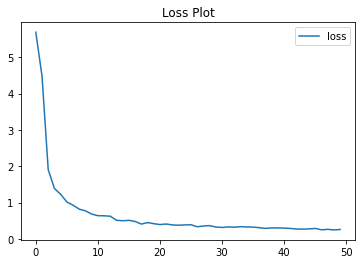

4/4 [==============================] - 1s 3ms/step
LSTM Model Test MSE: 0.014
LSTM Model Test RMSE: 0.117


C:\Users\pedro\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


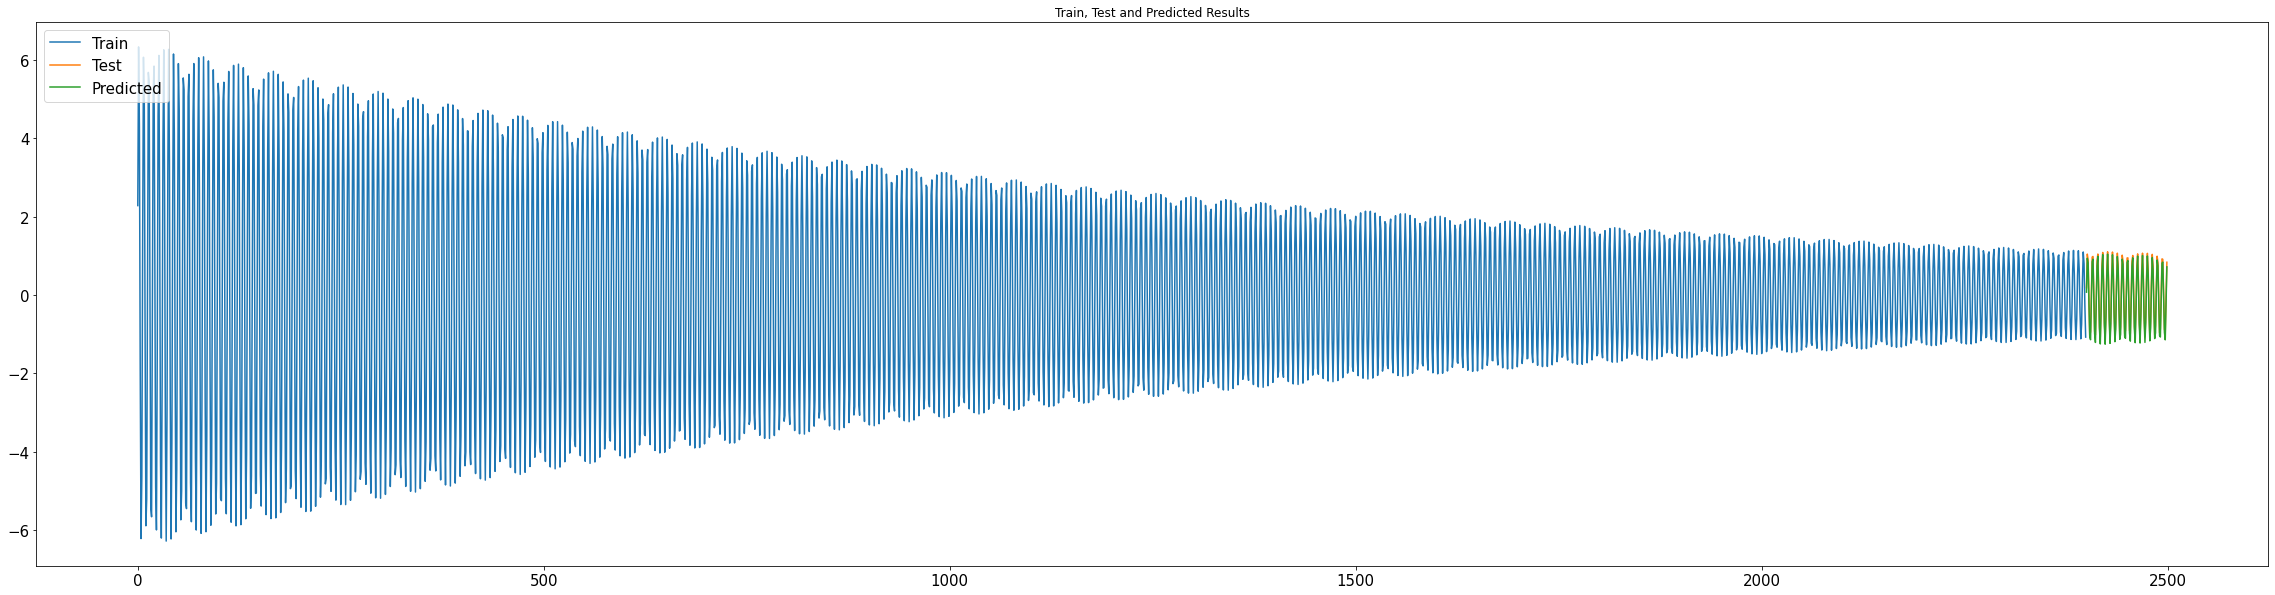

In [ ]:
lstm(X_train_1, y_train_1, X_test_1, y_test_1, 50, True, 0.01)

### 3.2.1.1. Second partition:

Epoch 1/50
79/79 [==============================] - 6s 9ms/step - loss: 0.1623 - mean_absolute_error: 0.3229
Epoch 2/50
79/79 [==============================] - 1s 10ms/step - loss: 0.1061 - mean_absolute_error: 0.2585
Epoch 3/50
79/79 [==============================] - 1s 8ms/step - loss: 0.0516 - mean_absolute_error: 0.1697
Epoch 4/50
79/79 [==============================] - 1s 8ms/step - loss: 0.0408 - mean_absolute_error: 0.1525
Epoch 5/50
79/79 [==============================] - 1s 8ms/step - loss: 0.0304 - mean_absolute_error: 0.1305
Epoch 6/50
79/79 [==============================] - 1s 8ms/step - loss: 0.0271 - mean_absolute_error: 0.1219
Epoch 7/50
79/79 [==============================] - 1s 8ms/step - loss: 0.0238 - mean_absolute_error: 0.1149
Epoch 8/50
79/79 [==============================] - 1s 8ms/step - loss: 0.0230 - mean_absolute_error: 0.1144
Epoch 9/50
79/79 [==============================] - 1s 8ms/step - loss: 0.0210 - mean_absolute_error: 0.1077
Epoch 10/50
79/79 

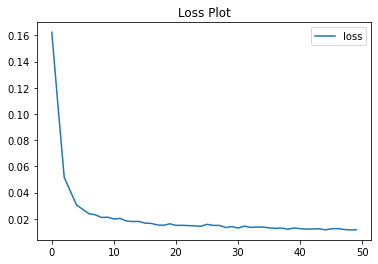

3/3 [==============================] - 1s 3ms/step
LSTM Model Test MSE: 0.001
LSTM Model Test RMSE: 0.034


C:\Users\pedro\anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


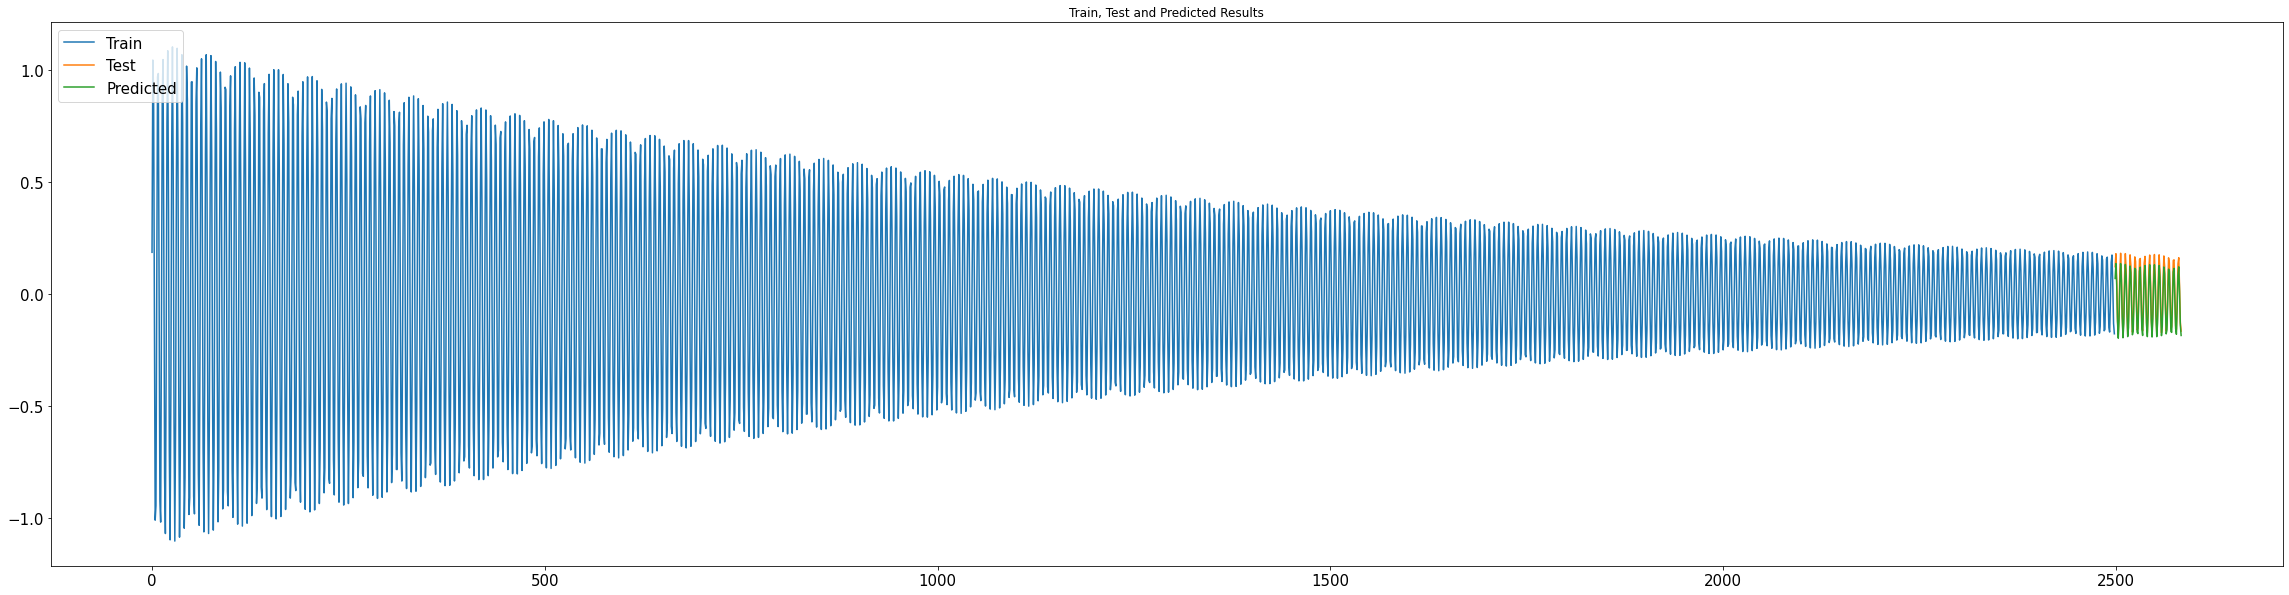

In [ ]:
lstm(X_train_2, y_train_2, X_test_2, y_test_2, 50, True, 0.01)

### 3.2.2. FTLFN Model

### 3.2.2.1. First partition:

75/75 [==============================] - 0s 811us/step - loss: 5.7861 - mean_absolute_error: 1.9439
Repeat 0) TrainMSE=5.782717, TestMSE=0.587739 

75/75 [==============================] - 0s 899us/step - loss: 5.7844 - mean_absolute_error: 1.9429
Repeat 1) TrainMSE=5.782780, TestMSE=0.587809 

75/75 [==============================] - 0s 757us/step - loss: 5.7841 - mean_absolute_error: 1.9431
Repeat 2) TrainMSE=5.782641, TestMSE=0.587658 

75/75 [==============================] - 0s 777us/step - loss: 5.7838 - mean_absolute_error: 1.9429


75/75 [==============================] - 0s 764us/step - loss: 5.7907 - mean_absolute_error: 1.9438
Repeat 3) TrainMSE=5.783737, TestMSE=0.587734 

75/75 [==============================] - 0s 845us/step - loss: 5.7857 - mean_absolute_error: 1.9435
Repeat 4) TrainMSE=5.783065, TestMSE=0.587864 

75/75 [==============================] - 0s 764us/step - loss: 5.7854 - mean_absolute_error: 1.9432
Repeat 5) TrainMSE=5.782646, TestMSE=0.587756 

75/75 [==============================] - 0s 804us/step - loss: 5.7840 - mean_absolute_error: 1.9429


75/75 [==============================] - 0s 770us/step - loss: 5.7840 - mean_absolute_error: 1.9429
Repeat 6) TrainMSE=5.782708, TestMSE=0.587729 

75/75 [==============================] - 0s 953us/step - loss: 5.7862 - mean_absolute_error: 1.9435
Repeat 7) TrainMSE=5.782774, TestMSE=0.587656 

75/75 [==============================] - 0s 787us/step - loss: 5.7869 - mean_absolute_error: 1.9432


75/75 [==============================] - 0s 818us/step - loss: 5.7849 - mean_absolute_error: 1.9433
Repeat 8) TrainMSE=5.782656, TestMSE=0.587702 

75/75 [==============================] - 0s 757us/step - loss: 5.7843 - mean_absolute_error: 1.9430
Repeat 9) TrainMSE=5.782639, TestMSE=0.587687 



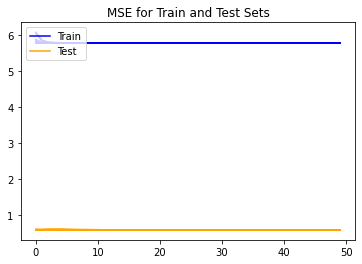

In [ ]:
run_ftlfn(X_train_1, y_train_1, X_test_1, y_test_1,10, 50, True, 0.01)

### 3.2.2.2. Second split:

79/79 [==============================] - 0s 891us/step - loss: 0.1702 - mean_absolute_error: 0.3306
Repeat 0) TrainMSE=0.170100, TestMSE=0.587714 

79/79 [==============================] - 0s 923us/step - loss: 0.1705 - mean_absolute_error: 0.3310
Repeat 1) TrainMSE=0.170327, TestMSE=0.588466 

79/79 [==============================] - 0s 885us/step - loss: 0.1702 - mean_absolute_error: 0.3307
Repeat 2) TrainMSE=0.170122, TestMSE=0.587875 

79/79 [==============================] - 0s 878us/step - loss: 0.1703 - mean_absolute_error: 0.3309


79/79 [==============================] - 0s 885us/step - loss: 0.1702 - mean_absolute_error: 0.3305
Repeat 3) TrainMSE=0.170155, TestMSE=0.587693 

79/79 [==============================] - 0s 904us/step - loss: 0.1702 - mean_absolute_error: 0.3305
Repeat 4) TrainMSE=0.170113, TestMSE=0.587880 

79/79 [==============================] - 0s 891us/step - loss: 0.1702 - mean_absolute_error: 0.3307
Repeat 5) TrainMSE=0.170099, TestMSE=0.587688 

79/79 [==============================] - 0s 949us/step - loss: 0.1703 - mean_absolute_error: 0.3309


79/79 [==============================] - 0s 898us/step - loss: 0.1704 - mean_absolute_error: 0.3308
Repeat 6) TrainMSE=0.170128, TestMSE=0.587662 

79/79 [==============================] - 0s 898us/step - loss: 0.1702 - mean_absolute_error: 0.3307
Repeat 7) TrainMSE=0.170096, TestMSE=0.587751 

79/79 [==============================] - 0s 885us/step - loss: 0.1703 - mean_absolute_error: 0.3308
Repeat 8) TrainMSE=0.170098, TestMSE=0.587742 

79/79 [==============================] - 0s 917us/step - loss: 0.1705 - mean_absolute_error: 0.3310


79/79 [==============================] - 0s 885us/step - loss: 0.1702 - mean_absolute_error: 0.3308
Repeat 9) TrainMSE=0.170102, TestMSE=0.587785 



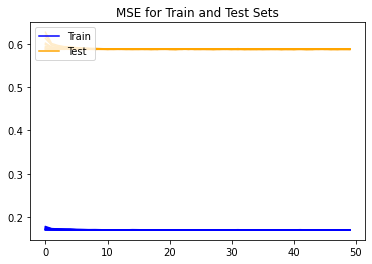

In [ ]:
run_ftlfn(X_train_2, y_train_2, X_test_2, y_test_2,10, 50, True, 0.01)

### 3.3. Evaluating the performance of LSTM and FTLFN models with both splits and with noise

 **LSTM Model - Split 1 Vs Split 2:** <p>
The acquired MSE findings reveal that split 2 had lower MSE values as the learning process progressed (epochs), but produced worse predictions than split 1. This may indicate that the model is overfitting.

<br>

**FTLFN Model - Split 1 Vs Split 2:** <p>
The training and test MSE obtained results for the split 2, showed to be smaller compared with split 1.

<br>

**LSTM vs FTLFN Model:** <p>
In both splits, LSTM model showed smaller MSE values compared with FTLFN model.

<br>